In [68]:
import os
import sys
import keras
import numpy as np
import tensorflow as tf
from keras.optimizers import SGD

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

print("TensorFlow version {}".format(tf.__version__))
print("Eager mode: ", tf.executing_eagerly())
print("Is GPU available: ", tf.test.is_gpu_available())

TensorFlow version 2.3.1
Eager mode:  True
Is GPU available:  True


In [69]:
class_list = ['baby','bicycle','boiling','car','carpassing','clock','dog','door','fire','glass','jackhammer','kettle','scream','siren','speech','unknown','whistle',]
num_classes = len(class_list)

samsung_label = np.zeros(7004, int)
samsung_test = np.zeros((7004,40,40,1), 'float32')

iphone_label = np.zeros(7004, int)
iphone_test = np.zeros((7004,40,40,1), 'float32')

lg_label = np.zeros(7004, int)     
lg_test = np.zeros((7004,40,40,1), 'float32')

pixel_label = np.zeros(7004, int)
pixel_test = np.zeros((7004,40,40,1), 'float32')

#----------------------------------------------------#

samsung_label2 = np.zeros(7004, int)
samsung_test2 = np.zeros((7004,40,40,1), 'float32')

iphone_label2 = np.zeros(7004, int)
iphone_test2 = np.zeros((7004,40,40,1), 'float32')

lg_label2 = np.zeros(7004, int)     
lg_test2 = np.zeros((7004,40,40,1), 'float32')

pixel_label2 = np.zeros(7004, int)
pixel_test2 = np.zeros((7004,40,40,1), 'float32')


In [70]:
samsung_list = '/data1/sss/workplace/tarsosDSP-2021/samsung_feat/samsung_feat_list.txt'
iphone_list = '/data1/sss/workplace/tarsosDSP-2021/iphone_feat/iphone_feat_list.txt'
lg_list = '/data1/sss/workplace/tarsosDSP-2021/lg_feat/lg_feat_list.txt'
pixel_list = '/data1/sss/workplace/tarsosDSP-2021/pixel_feat/pixel_feat_list.txt'
use_transpose = True
use_norm = False


with open(samsung_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        samsung_test[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            samsung_test[i,:,:,0] = np.transpose(samsung_test[i,:,:,0])
        if use_norm:
            samsung_test[i,:,:,0] = (samsung_test[i,:,:,0] - np.min(samsung_test[i,:,:,0])) / (np.max(samsung_test[i,:,:,0]) - np.min(samsung_test[i,:,:,0]))
        samsung_label[i] = class_list.index(file.split('/')[-2])
        
print(samsung_test.shape)
print(samsung_label.shape)

with open(iphone_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        iphone_test[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            iphone_test[i,:,:,0] = np.transpose(iphone_test[i,:,:,0])
        if use_norm:
            iphone_test[i,:,:,0] = (iphone_test[i,:,:,0] - np.min(iphone_test[i,:,:,0])) / (np.max(iphone_test[i,:,:,0]) - np.min(iphone_test[i,:,:,0]))
        iphone_label[i] = class_list.index(file.split('/')[-2])
        
print(iphone_test.shape)
print(iphone_label.shape)
        
with open(lg_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        lg_test[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            lg_test[i,:,:,0] = np.transpose(lg_test[i,:,:,0])
        if use_norm:
            lg_test[i,:,:,0] = (lg_test[i,:,:,0] - np.min(lg_test[i,:,:,0])) / (np.max(lg_test[i,:,:,0]) - np.min(lg_test[i,:,:,0]))
        lg_label[i] = class_list.index(file.split('/')[-2])
        
print(lg_test.shape)
print(lg_label.shape)
        
with open(pixel_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        pixel_test[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            pixel_test[i,:,:,0] = np.transpose(pixel_test[i,:,:,0])
        if use_norm:
            pixel_test[i,:,:,0] = (pixel_test[i,:,:,0] - np.min(pixel_test[i,:,:,0])) / (np.max(pixel_test[i,:,:,0]) - np.min(pixel_test[i,:,:,0]))
        pixel_label[i] = class_list.index(file.split('/')[-2])

print(pixel_test.shape)
print(pixel_label.shape)

#----------------------------------------------------#

samsung_list = '/data1/sss/workplace/tarsosDSP-2021/samsung_feat/samsung_feat_list.txt'
iphone_list = '/data1/sss/workplace/tarsosDSP-2021/iphone_feat/iphone_feat_list.txt'
lg_list = '/data1/sss/workplace/tarsosDSP-2021/lg_feat/lg_feat_list.txt'
pixel_list = '/data1/sss/workplace/tarsosDSP-2021/pixel_feat/pixel_feat_list.txt'
use_transpose = True
use_norm = False


with open(samsung_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        samsung_test2[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            samsung_test2[i,:,:,0] = np.transpose(samsung_test2[i,:,:,0])
        if use_norm:
            samsung_test2[i,:,:,0] = (samsung_test2[i,:,:,0] - np.min(samsung_test2[i,:,:,0])) / (np.max(samsung_test2[i,:,:,0]) - np.min(samsung_test2[i,:,:,0]))
        samsung_label2[i] = class_list.index(file.split('/')[-2])
        
print(samsung_test2.shape)
print(samsung_label2.shape)

with open(iphone_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        iphone_test2[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            iphone_test2[i,:,:,0] = np.transpose(iphone_test2[i,:,:,0])
        if use_norm:
            iphone_test2[i,:,:,0] = (iphone_test2[i,:,:,0] - np.min(iphone_test2[i,:,:,0])) / (np.max(iphone_test2[i,:,:,0]) - np.min(iphone_test2[i,:,:,0]))
        iphone_label2[i] = class_list.index(file.split('/')[-2])
        
print(iphone_test2.shape)
print(iphone_label2.shape)
        
with open(lg_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        lg_test2[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            lg_test2[i,:,:,0] = np.transpose(lg_test2[i,:,:,0])
        if use_norm:
            lg_test2[i,:,:,0] = (lg_test2[i,:,:,0] - np.min(lg_test2[i,:,:,0])) / (np.max(lg_test2[i,:,:,0]) - np.min(lg_test2[i,:,:,0]))
        lg_label2[i] = class_list.index(file.split('/')[-2])
        
print(lg_test2.shape)
print(lg_label2.shape)
        
with open(pixel_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        pixel_test2[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            pixel_test2[i,:,:,0] = np.transpose(pixel_test2[i,:,:,0])
        if use_norm:
            pixel_test2[i,:,:,0] = (pixel_test2[i,:,:,0] - np.min(pixel_test2[i,:,:,0])) / (np.max(pixel_test2[i,:,:,0]) - np.min(pixel_test2[i,:,:,0]))
        pixel_label2[i] = class_list.index(file.split('/')[-2])

print(pixel_test2.shape)
print(pixel_label2.shape)


(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)


(40, 40)
clock


/home/soonshin/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/soonshin/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


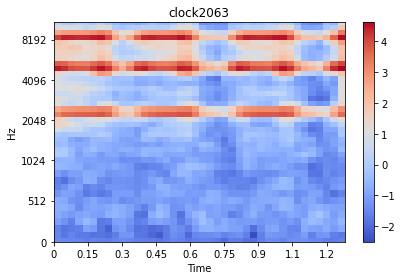

(40, 40)
clock


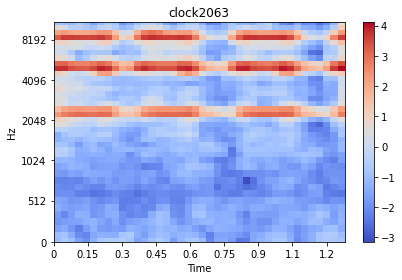

(40, 40)
clock


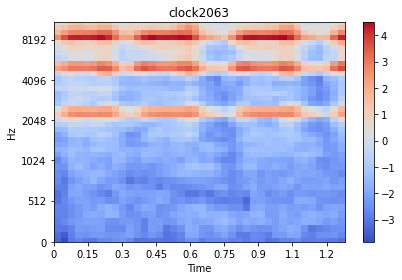

(40, 40)
clock


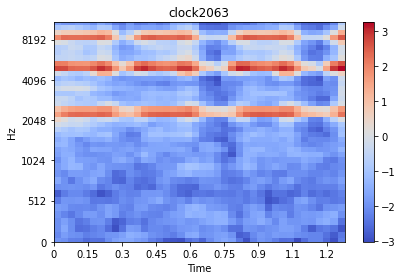

In [71]:
import librosa.display
import matplotlib.pyplot as plt

i= 2063
sample = samsung_test[i,:,:,0]
print (sample.shape)
print (class_list[samsung_label[i]])

librosa.display.specshow(sample, sr=16000, cmap='coolwarm', x_axis='time', y_axis='mel')
plt.title(class_list[samsung_label[i]]+str(i))
plt.colorbar()
plt.tight_layout()
plt.show() 


sample = iphone_test[i,:,:,0]
print (sample.shape)
print (class_list[iphone_label[i]])

librosa.display.specshow(sample, sr=16000, cmap='coolwarm', x_axis='time', y_axis='mel')
plt.title(class_list[iphone_label[i]]+str(i))
plt.colorbar()
plt.tight_layout()
plt.show() 


sample = lg_test[i,:,:,0]
print (sample.shape)
print (class_list[lg_label[i]])

librosa.display.specshow(sample, sr=16000, cmap='coolwarm', x_axis='time', y_axis='mel')
plt.title(class_list[lg_label[i]]+str(i))
plt.colorbar()
plt.tight_layout()
plt.show() 


sample = pixel_test[i,:,:,0]
print (sample.shape)
print (class_list[pixel_label[i]])

librosa.display.specshow(sample, sr=16000, cmap='coolwarm', x_axis='time', y_axis='mel')
plt.title(class_list[pixel_label[i]]+str(i))
plt.colorbar()
plt.tight_layout()
plt.show() 

In [76]:
test_model_path = 'model_save/mobilenet-ca-fusion-freq.hdf5'
model = tf.keras.models.load_model(test_model_path)
#model.summary()

#----------------------------------------------------#

test_model_path2 = 'model_save/mobilenet-ca-fusion-freq-finetune.hdf5'
model2 = tf.keras.models.load_model(test_model_path2)
#model.summary()


In [77]:
result1 = model.evaluate(samsung_test, samsung_label)
result2 = model.evaluate(iphone_test, iphone_label)
result3 = model.evaluate(lg_test, lg_label)
result4 = model.evaluate(pixel_test, pixel_label)

#----------------------------------------------------#

result1 = model2.evaluate(samsung_test2, samsung_label2)
result2 = model2.evaluate(iphone_test2, iphone_label2)
result3 = model2.evaluate(lg_test2, lg_label2)
result4 = model2.evaluate(pixel_test2, pixel_label2)


219/219 [==============================] - 1s 7ms/step - loss: 0.3554 - accuracy: 0.0610


0.8633637921187892
Normalized confusion matrix
0.915619645916619
Normalized confusion matrix
0.875214163335237
Normalized confusion matrix
0.9610222729868646
Normalized confusion matrix
0.9038049685893774
0.8633637921187892
0.0404411764705882


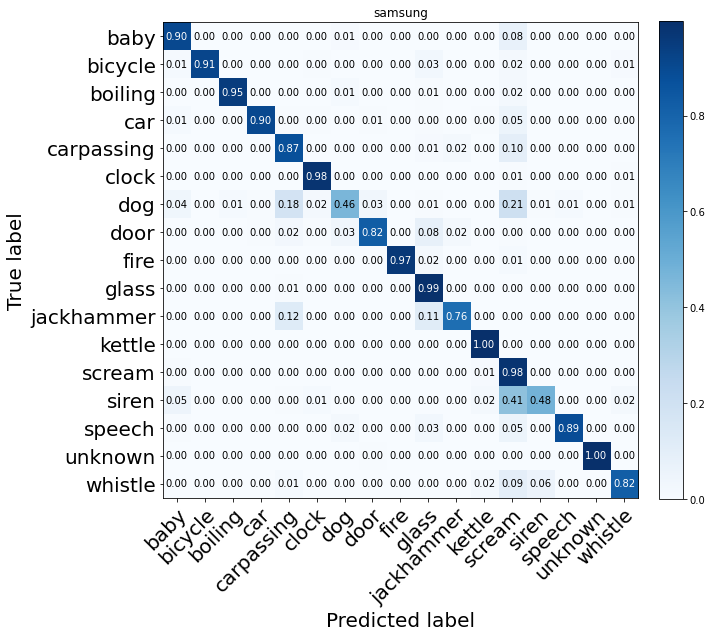

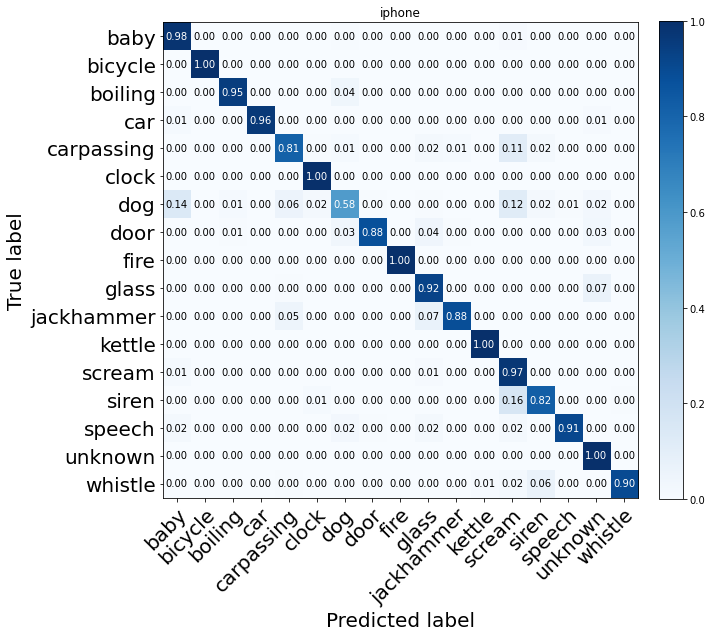

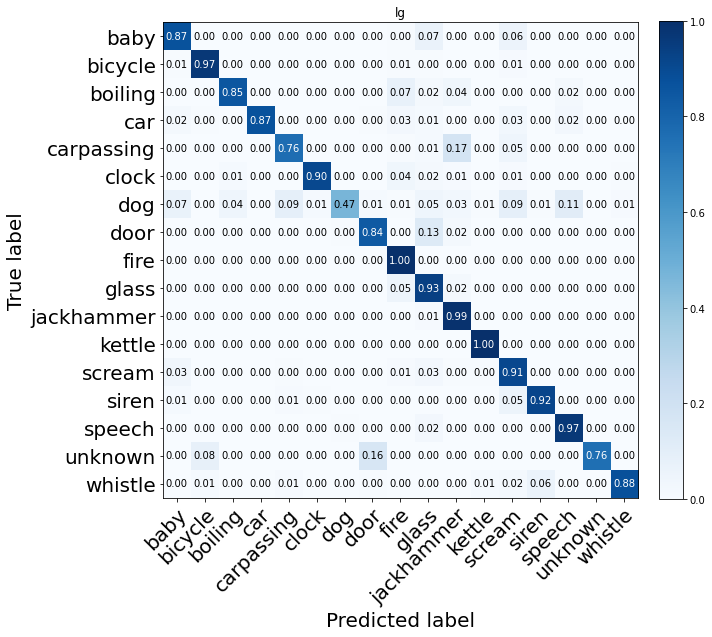

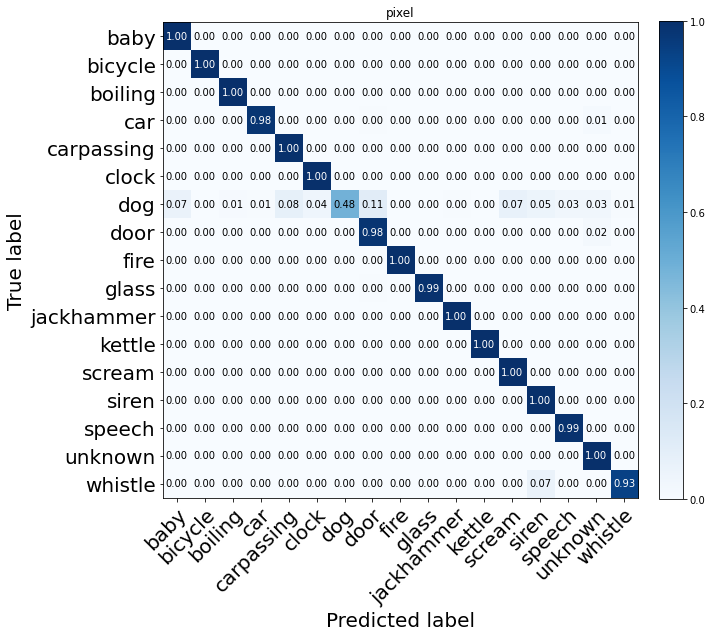

In [78]:
from plots import plot_confusion_matrix

output_prob_test = model.predict(samsung_test)
y_pred_test = np.argmax(output_prob_test, axis=1)

samsung_precision_idx = []

true = 0
precision = 0
for i in range(7004):
    precision += 1
    samsung_precision_idx.append(i)
    if y_pred_test[i] == samsung_label[i]:
        true += 1

samsung_acc = true/precision
print(samsung_acc)

plot_confusion_matrix(samsung_label[samsung_precision_idx], 
                      y_pred_test[samsung_precision_idx], 
                      class_list, 
                      normalize=True, 
                      title="samsung")

#----------------------------------------------------#

output_prob_test = model.predict(iphone_test)
y_pred_test = np.argmax(output_prob_test, axis=1)

iphone_precision_idx = []

true = 0
precision = 0
for i in range(7004):
    precision += 1
    iphone_precision_idx.append(i)
    if y_pred_test[i] == iphone_label[i]:
        true += 1

iphone_acc = true/precision
print(iphone_acc)

plot_confusion_matrix(iphone_label[iphone_precision_idx], 
                      y_pred_test[iphone_precision_idx], 
                      class_list, 
                      normalize=True, 
                      title="iphone")

#----------------------------------------------------#

output_prob_test = model.predict(lg_test)
y_pred_test = np.argmax(output_prob_test, axis=1)

lg_precision_idx = []

true = 0
precision = 0
for i in range(7004):
    precision += 1
    lg_precision_idx.append(i)
    if y_pred_test[i] == lg_label[i]:
        true += 1

lg_acc = true/precision
print(lg_acc)

plot_confusion_matrix(lg_label[lg_precision_idx], 
                      y_pred_test[lg_precision_idx], 
                      class_list, 
                      normalize=True, 
                      title="lg")

#----------------------------------------------------#

output_prob_test = model.predict(pixel_test)
y_pred_test = np.argmax(output_prob_test, axis=1)

pixel_precision_idx = []

true = 0
precision = 0
for i in range(7004):
    precision += 1
    pixel_precision_idx.append(i)
    if y_pred_test[i] == pixel_label[i]:
        true += 1

pixel_acc = true/precision
print(pixel_acc)

plot_confusion_matrix(pixel_label[pixel_precision_idx], 
                      y_pred_test[pixel_precision_idx], 
                      class_list, 
                      normalize=True, 
                      title="pixel")

avg_acc = sum([samsung_acc, iphone_acc, lg_acc, pixel_acc]) / 4
print (avg_acc)
min_acc = min(samsung_acc, iphone_acc, lg_acc, pixel_acc)
print (min_acc)

print (avg_acc - min_acc)

In [79]:

output_prob_test1 = model.predict(samsung_test)
y_pred_test1 = np.argmax(output_prob_test1, axis=1)

output_prob_test2 = model2.predict(samsung_test2)
y_pred_test2 = np.argmax(output_prob_test2, axis=1)

y_pred_test = (y_pred_test1 + y_pred_test2) / 2 

samsung_precision_idx = []

true = 0
precision = 0
for i in range(7004):
    precision += 1
    samsung_precision_idx.append(i)
    if y_pred_test[i] == samsung_label[i]:
        true += 1

samsung_acc = true/precision
print(samsung_acc)

#----------------------------------------------------#

output_prob_test1 = model.predict(iphone_test)
y_pred_test1 = np.argmax(output_prob_test1, axis=1)

output_prob_test2 = model2.predict(iphone_test2)
y_pred_test2 = np.argmax(output_prob_test2, axis=1)

y_pred_test = (y_pred_test1 + y_pred_test2) / 2 


iphone_precision_idx = []

true = 0
precision = 0
for i in range(7004):
    precision += 1
    iphone_precision_idx.append(i)
    if y_pred_test[i] == iphone_label[i]:
        true += 1

iphone_acc = true/precision
print(iphone_acc)

#----------------------------------------------------#

output_prob_test1 = model.predict(lg_test)
y_pred_test1 = np.argmax(output_prob_test1, axis=1)

output_prob_test2 = model2.predict(lg_test2)
y_pred_test2 = np.argmax(output_prob_test2, axis=1)

y_pred_test = (y_pred_test1 + y_pred_test2) / 2 


lg_precision_idx = []

true = 0
precision = 0
for i in range(7004):
    precision += 1
    lg_precision_idx.append(i)
    if y_pred_test[i] == lg_label[i]:
        true += 1

lg_acc = true/precision
print(lg_acc)

#----------------------------------------------------#

output_prob_test1 = model.predict(pixel_test)
y_pred_test1 = np.argmax(output_prob_test1, axis=1)

output_prob_test2 = model2.predict(pixel_test2)
y_pred_test2 = np.argmax(output_prob_test2, axis=1)

y_pred_test = (y_pred_test1 + y_pred_test2) / 2 


pixel_precision_idx = []

true = 0
precision = 0
for i in range(7004):
    precision += 1
    pixel_precision_idx.append(i)
    if y_pred_test[i] == pixel_label[i]:
        true += 1

pixel_acc = true/precision
print(pixel_acc)

avg_acc = sum([samsung_acc, iphone_acc, lg_acc, pixel_acc]) / 4
print (avg_acc)
min_acc = min(samsung_acc, iphone_acc, lg_acc, pixel_acc)
print (min_acc)

print (avg_acc - min_acc)


0.8159623072529982
0.8997715591090806
0.7548543689320388
0.9573101085094232
0.8569745859508853
0.7548543689320388
0.10212021701884644
